In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [4]:
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [5]:
import csv
import pandas as pd

In [8]:
vizgen_dir = Path().resolve() /'home'/'jupyter'/'region_7'
adata = sq.read.vizgen(
    path='/home/jupyter/region_7',
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    #transformation_file="micron_to_mosaic_pixel_transform.csv",
)

In [9]:
ser_exp = adata.to_df().sum(axis=1)
adata.obs['ExpressionCounts'] = ser_exp

<AxesSubplot:xlabel='ExpressionCounts', ylabel='Count'>

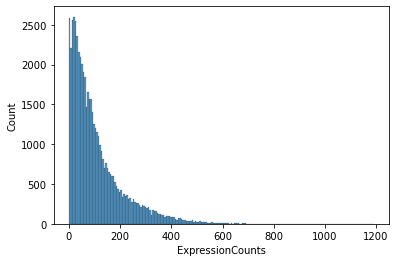

In [9]:
#fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(
    adata.obs["ExpressionCounts"],
    #log_scale=10,
    #kde=False,
    #ax=axs[0],
)
#g.set(xlim=(0, 500))

[(0.0, 1000.0)]

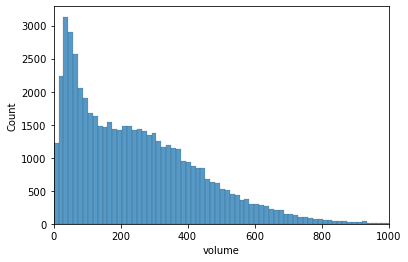

In [10]:
g=sns.histplot(
    adata.obs["volume"],
    #kde=False,
    #bins=60,
    #ax=axs[2],
)
g.set(xlim=(0, 1000))

In [10]:
adata

AnnData object with n_obs × n_vars = 54944 × 228
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts'
    uns: 'spatial'
    obsm: 'spatial'

In [11]:
sc.pp.filter_cells(adata, min_counts=10)
#sc.pp.filter_genes(adata, min_cells=10)

In [12]:
adata

AnnData object with n_obs × n_vars = 50952 × 228
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [13]:
adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

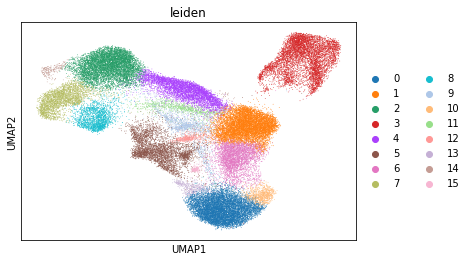

In [26]:
sc.pl.umap(
    adata,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

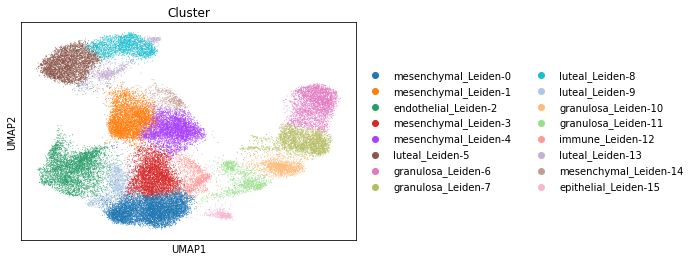

In [23]:
sc.pl.umap(
    adata,
    color=[
        "Cluster",
    ],
    wspace=0.4,
    #figsize=(15, 15),
    cmap = 'tab20b',
)

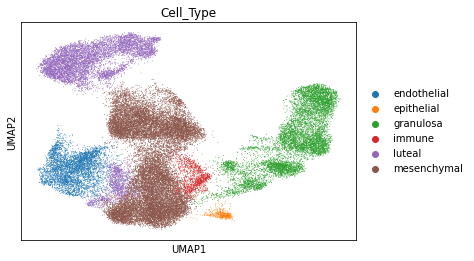

In [24]:
sc.pl.umap(
    adata,
    color=[
        "Cell_Type",
    ],
    wspace=0.4,
    #figsize=(15, 15),
    cmap = 'tab20b',
)

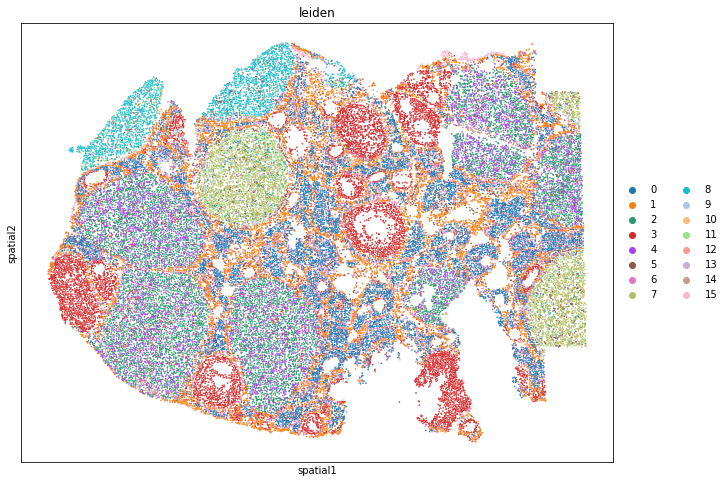

In [16]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    size=0.5,
    library_id='spatial',
    figsize=(10, 10)
)

In [14]:
df_ref_panel_ini = pd.read_excel('/home/jupyter/Marker_0hrs.xlsx', index_col=0)
#df_ref_panel = df_ref_panel_ini.iloc[1:,2]
df_ref_panel = df_ref_panel_ini[df_ref_panel_ini.iloc[:, 2].notnull()]
df_ref_panel

Source Mouse Specific?   \
Gene                                                                          
Aldh1a1  gerton ; Richards ; ruptured/unruptured, post hCG              NaN   
Amh                                   GC_markers_YYcurated              NaN   
Amhr2                                 GC_markers_YYcurated              NaN   
Apoe                                 gerton / PNAS / Britt              NaN   
Bhmt                                        gerton dataset              NaN   
Ccl5                                 gerton / PNAS / Britt              NaN   
Cd14                                 gerton / PNAS / Britt              NaN   
Cd74                                 gerton / PNAS / Britt              NaN   
Cldn5                     gerrton dataset and PNAS dataset              NaN   
Cyp17a1                                      Richards_Data              NaN   
Egfl7                     gerrton dataset and PNAS dataset              NaN   
Epcam                      gerton / Britt ; gerton dataset              NaN   
Fst      GC_markers_Yycurated ; ruptured/unruptured, po...              NaN   
Gm2a                                                gerton              NaN   
H2-Aa                                gerton / PNAS / Britt              NaN   
H2-Ab1                               gerton / PNAS / Britt              NaN   
Hao2                                                gerton              NaN   
Inha     GC_markers_Yycurated ; ruptured/unruptured, no...              NaN   
Krt18                                       gerton / Britt              NaN   
Krt19                GC_markers_Yycurated ; gerton / Britt              NaN   
Krt7                                        gerton / Britt              NaN   
Lhcgr       gerton dataset ; ruptured/unruptured, post hCG              NaN   
Ly6e                                        gerton / Britt              NaN   
Mgarp                                               gerton              NaN   
Nap1l5                         ruptured/unruptured, no hCG              NaN   
Pecamp1                                     gerton dataset              Yes   
Prlr                                                gerton              NaN   
Rspo1                                 GC_markers_YYcurated              NaN   
S100a9                                       PNAS dataset               NaN   
Tom1l1                                       Richards_Data              NaN   
Upk3b                                 GC_markers_YYcurated              NaN   

                      NOTES  \
Gene                          
Aldh1a1        mesenchymal    
Amh                GC_Small   
Amhr2              GC_Small   
Apoe     immune: macs/monos   
Bhmt               GC_Small   
Ccl5     immune: macs/monos   
Cd14     immune: macs/monos   
Cd74     immune: macs/monos   
Cldn5           endothelial   
Cyp17a1        mesenchymal    
Egfl7          endothelial    
Epcam           epithelial    
Fst                GC_Small   
Gm2a                 luteal   
H2-Aa    immune: macs/monos   
H2-Ab1   immune: macs/monos   
Hao2           mesenchymal    
Inha               GC_Small   
Krt18           epithelial    
Krt19           epithelial    
Krt7            epithelial    
Lhcgr              GC_Small   
Ly6e            epithelial    
Mgarp          mesenchymal    
Nap1l5             GC_Small   
Pecamp1         endothelial   
Prlr                 luteal   
Rspo1           epithelial    
S100a9                        
Tom1l1             GC_Small   
Upk3b           epithelial    

                                          Gene Description  \
Gene                                                         
Aldh1a1                                                NaN   
Amh                                 anti-Mullerian hormone   
Amhr2               anti-Mullerian hormone receptor type 2   
Apoe                                                   NaN   
Bhmt                                            

In [15]:
marker_genes = df_ref_panel.index.tolist()
meta_gene = deepcopy(adata.var)
common_marker_genes = list(set(meta_gene.index.tolist()).intersection(marker_genes))
meta_gene.loc[common_marker_genes, 'Markers'] = df_ref_panel.loc[common_marker_genes, 'NOTES']
meta_gene['Markers'] = meta_gene['Markers'].apply(lambda x: 'N.A.' if 'marker' not in str(x) else x)
meta_gene['Markers'].value_counts()

N.A.    228
Name: Markers, dtype: int64

In [16]:
ser_counts = adata.obs['leiden'].value_counts()
ser_counts.name = 'cell counts'
meta_leiden = pd.DataFrame(ser_counts)

cat_name = 'leiden'
sig_leiden = pd.DataFrame(columns=adata.var_names, index=adata.obs[cat_name].cat.categories)
for clust in adata.obs[cat_name].cat.categories:
    sig_leiden.loc[clust] = adata[adata.obs[cat_name].isin([clust]),:].X.mean(0)
sig_leiden = sig_leiden.transpose()
leiden_clusters = ['Leiden-' + str(x) for x in sig_leiden.columns.tolist()]
sig_leiden.columns = leiden_clusters
meta_leiden.index = sig_leiden.columns.tolist()
meta_leiden['leiden'] = pd.Series(meta_leiden.index.tolist(), index=meta_leiden.index.tolist())

In [17]:
meta_leiden

cell counts     leiden
Leiden-0          8127   Leiden-0
Leiden-1          7745   Leiden-1
Leiden-2          6773   Leiden-2
Leiden-3          6124   Leiden-3
Leiden-4          4780   Leiden-4
Leiden-5          3982   Leiden-5
Leiden-6          3636   Leiden-6
Leiden-7          2752   Leiden-7
Leiden-8          1970   Leiden-8
Leiden-9          1589   Leiden-9
Leiden-10          987  Leiden-10
Leiden-11          964  Leiden-11
Leiden-12          543  Leiden-12
Leiden-13          489  Leiden-13
Leiden-14          255  Leiden-14
Leiden-15          236  Leiden-15

In [18]:
meta_gene = pd.DataFrame(index=sig_leiden.index.tolist())
meta_gene['info'] = pd.Series('', index=meta_gene.index.tolist())
meta_gene['Markers'] = pd.Series('N.A.', index=sig_leiden.index.tolist())
meta_gene.loc[common_marker_genes, 'Markers'] = df_ref_panel.loc[common_marker_genes, 'NOTES']

meta_leiden['Cell_Type'] = pd.Series('N.A.', index=meta_leiden.index.tolist())
num_top_genes = 10
for inst_cluster in sig_leiden.columns.tolist():
  top_genes = sig_leiden[inst_cluster].sort_values(ascending=False).index.tolist()[:num_top_genes]

  inst_ser = meta_gene.loc[top_genes, 'Markers']
  inst_ser = inst_ser[inst_ser != 'N.A.']
  ser_counts = inst_ser.value_counts()

  max_count = ser_counts.max()

  max_cat = '_'.join(sorted(ser_counts[ser_counts == max_count].index.tolist()))
  max_cat = max_cat.replace(' marker', '').replace(' ', '-')

  print(inst_cluster, max_cat)
  meta_leiden.loc[inst_cluster, 'Cell_Type'] = max_cat

Leiden-0 mesenchymal-
Leiden-1 
Leiden-2 luteal
Leiden-3 GC_Small
Leiden-4 
Leiden-5 endothelial_endothelial-_epithelial-
Leiden-6 immune:-macs/monos_mesenchymal-
Leiden-7 luteal
Leiden-8 luteal
Leiden-9 immune:-macs/monos
Leiden-10 GC_Small_mesenchymal-
Leiden-11 luteal
Leiden-12 
Leiden-13 mesenchymal-
Leiden-14 luteal
Leiden-15 epithelial-


In [19]:
n = 0

for inst_cluster in sig_leiden.columns.tolist():
    top_genes = sig_leiden[inst_cluster].sort_values(ascending=False).index.tolist()[:num_top_genes]
    print(top_genes)

['Aldh1a1', 'Cyp11a1', 'Idh1', 'Hmgcs2', 'Inha', 'Mgarp', 'Prlr', 'Fdx1', 'Hao2', 'Pank1']
['Dcn', 'Vim', 'Col1a2', 'Hmgcs2', 'Mfap4', 'Col3a1', 'Fgl2', 'Foxl2', 'Col1a1', 'Dhrs3']
['Star', 'Sfrp4', 'Cyp11a1', 'Idh1', 'Prlr', 'Gm2a', 'Fdx1', 'Vim', 'Rgcc', 'Pank1']
['Inha', 'Serpine2', 'Hmgcs2', 'St3gal5', 'Nap1l5', 'Fst', 'Amh', 'Amhr2', 'Foxl2', 'Idh1']
['Star', 'Cyp11a1', 'Sfrp4', 'Col1a2', 'Col3a1', 'Idh1', 'Vim', 'Col1a1', 'Dcn', 'Cdh11']
['Vim', 'Pecam1', 'Cldn5', 'Tnfrsf1a', 'Idh1', 'Ly6e', 'Egfl7', 'Cyp11a1', 'Dhrs3', 'Efnb2']
['Dcn', 'Cyp11a1', 'Hmgcs2', 'Aldh1a1', 'Vim', 'Idh1', 'Col3a1', 'Col1a2', 'Dhrs3', 'Apoe']
['Sfrp4', 'Idh1', 'Gm2a', 'Cyp11a1', 'Prlr', 'Vim', 'Star', 'St3gal5', 'Runx2', 'Hmgcs2']
['Idh1', 'Star', 'Cyp11a1', 'Gm2a', 'Prlr', 'Fdx1', 'Runx2', 'Lhcgr', 'Sfrp4', 'Foxl2']
['Apoe', 'Cd74', 'Lyz2', 'Vim', 'Idh1', 'Cyp11a1', 'Gatm', 'Dhrs3', 'H2-Aa', 'Dcn']
['Cyp17a1', 'Cyp11a1', 'Aldh1a1', 'Inha', 'Hmgcs2', 'Idh1', 'Lhcgr', 'Fdx1', 'Star', 'Prlr']
['Idh1', 'Co

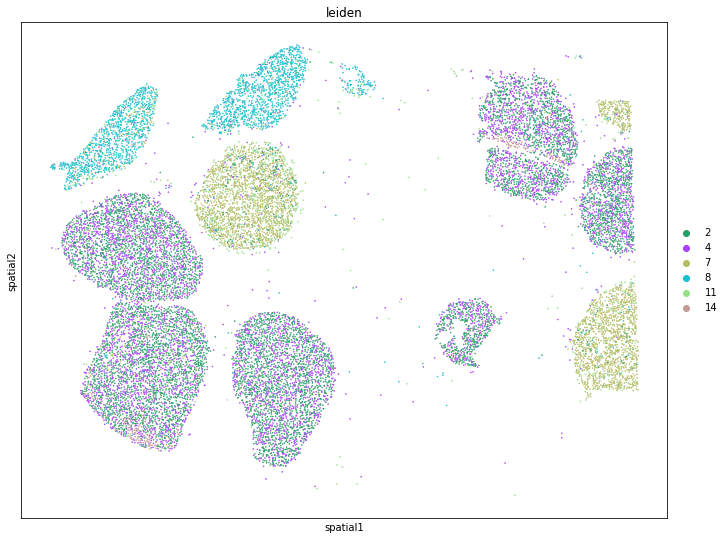

In [40]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['2','7','8','11','14','4'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

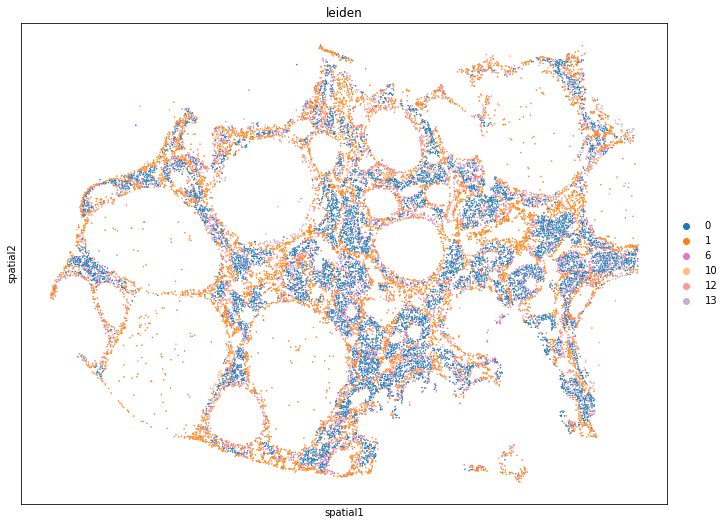

In [41]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['0','6','10','13','1','12'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

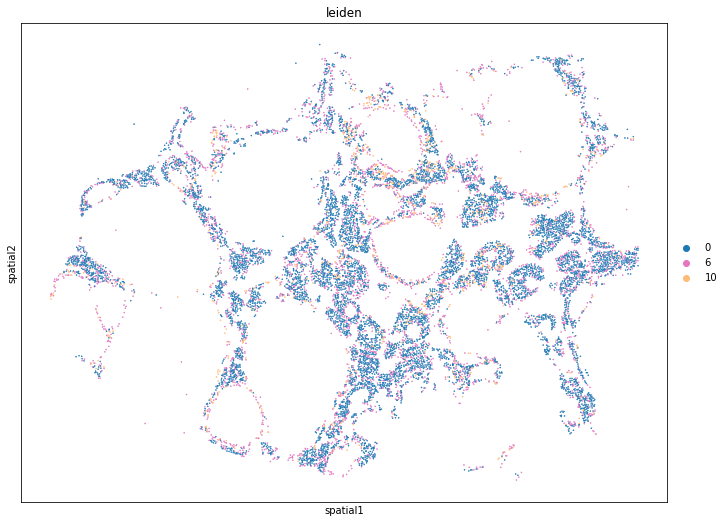

In [46]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['0','6','10'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

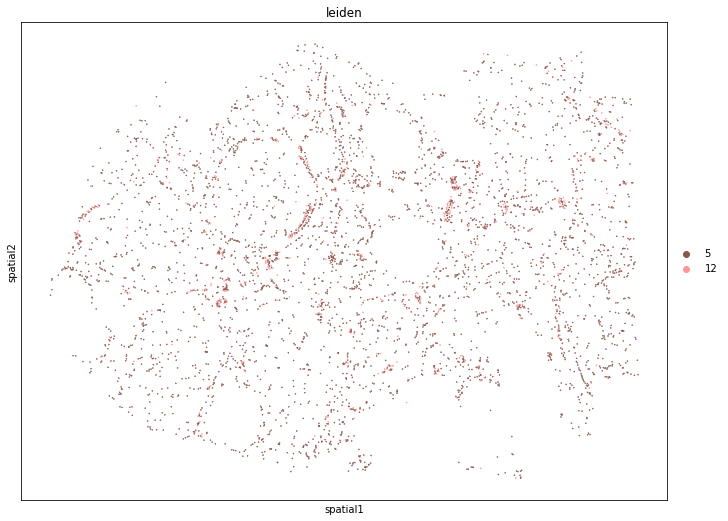

In [7]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['12','5'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

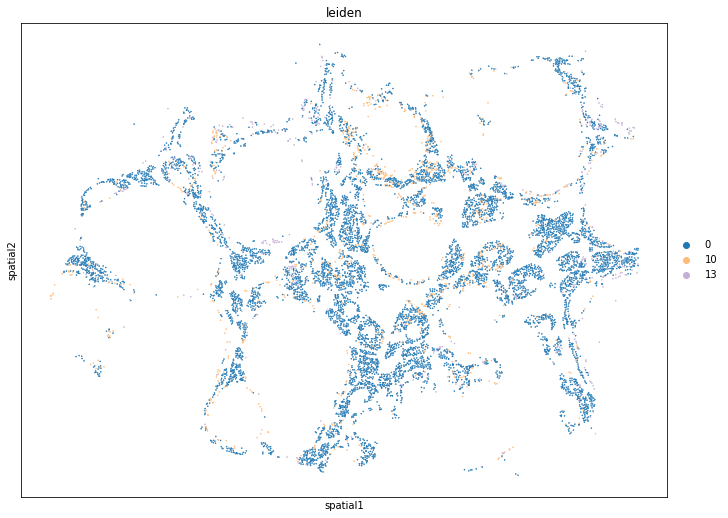

In [51]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['0','13','10'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

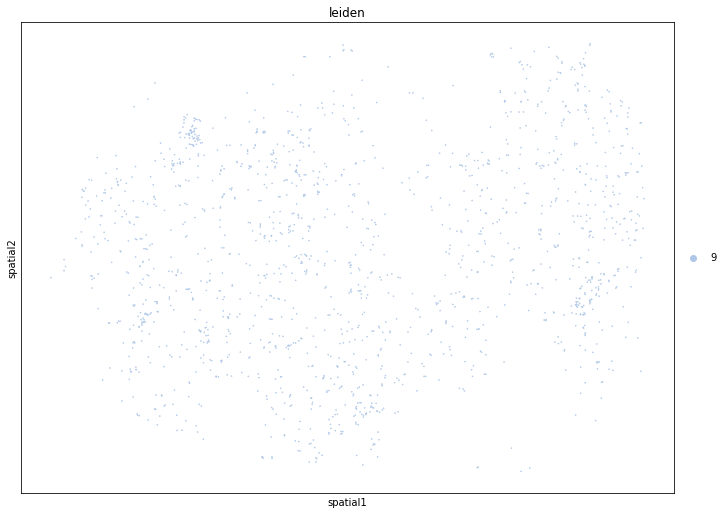

In [28]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['9'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

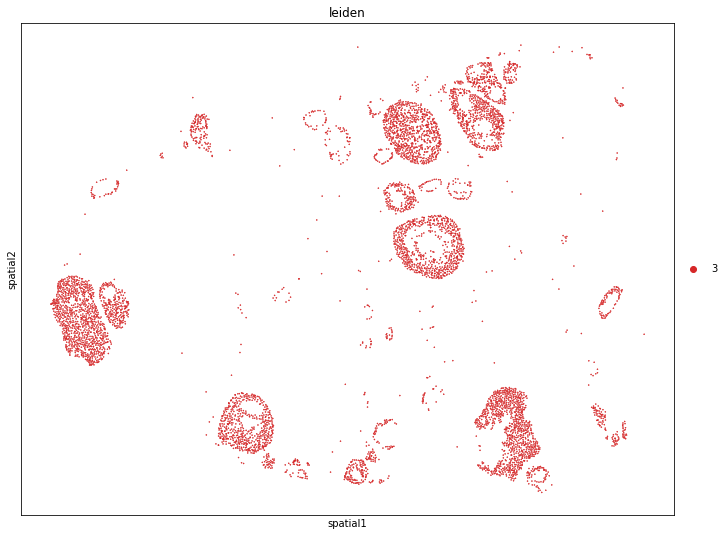

In [29]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['3'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

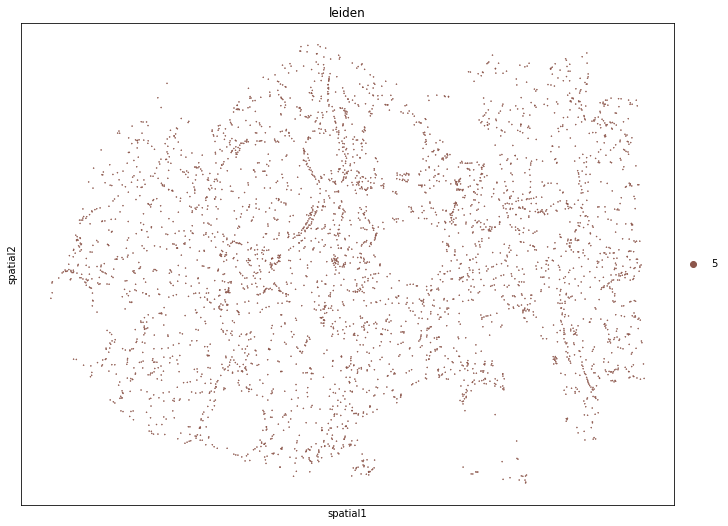

In [37]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['5'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

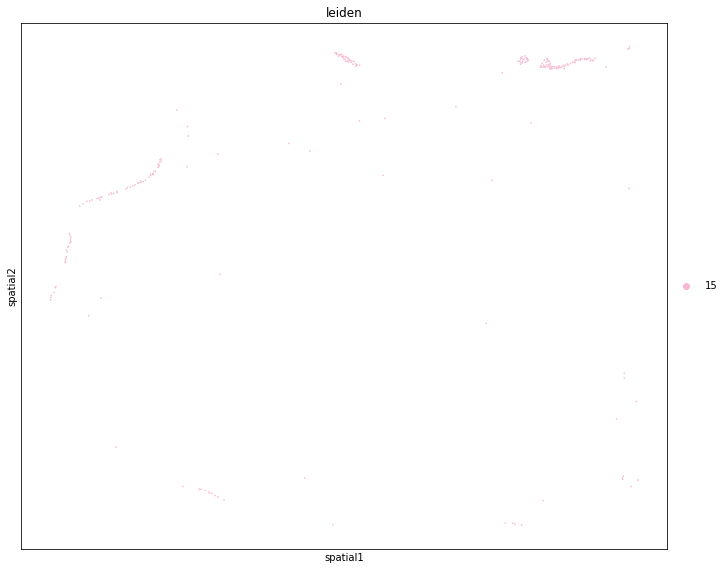

In [33]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['15'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

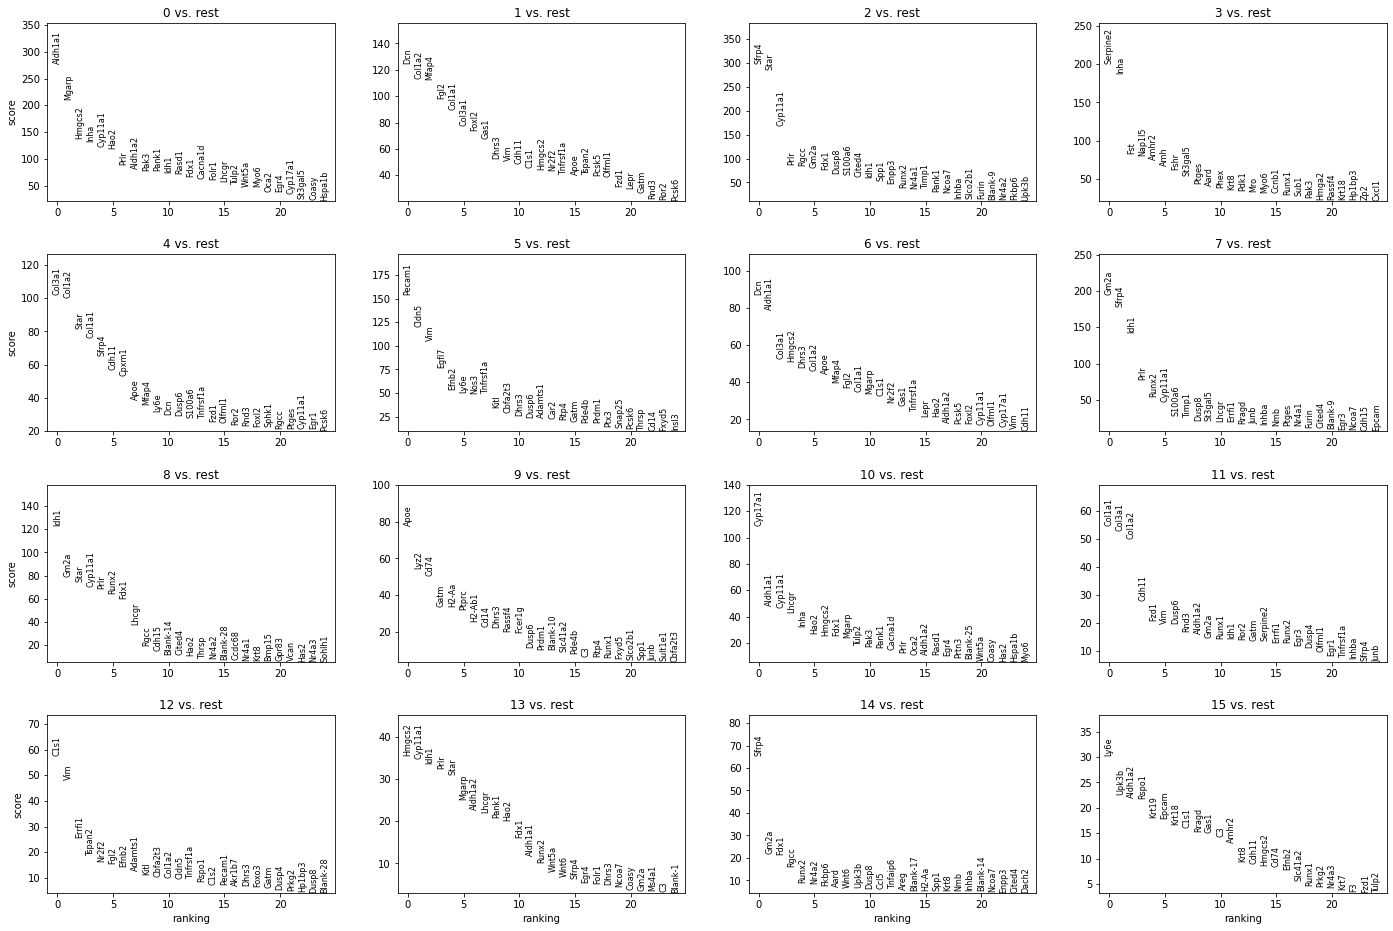

In [50]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")

0 - theca
1 - stroma
6 - stroma
10 - theca
12 - stroma
13 - theca

In [20]:
def get_new_value(leiden_value):
    if leiden_value in ['Leiden-1','Leiden-6']:
        return 'stroma'
    elif leiden_value in ['Leiden-0','Leiden-10','Leiden-13']:
        return 'theca'
    elif leiden_value in ['Leiden-2','Leiden-7','Leiden-8','Leiden-11','Leiden-14','Leiden-4']:
        return 'luteal'
    elif leiden_value in ['Leiden-15']:
        return 'epithelial'
    elif leiden_value in ['Leiden-3']:
        return 'granulosa'
    elif leiden_value in ['Leiden-9']:
        return 'immune'
    elif leiden_value in ['Leiden-5','Leiden-12']:
        return 'endothelial'
    else:
        return 'unknown1'

# apply the function to each row of the 'Leiden' column using the apply() method
meta_leiden['Cell_Type'] = meta_leiden['leiden'].apply(lambda x: get_new_value(x))

print(meta_leiden)

           cell counts     leiden    Cell_Type
Leiden-0          8127   Leiden-0        theca
Leiden-1          7745   Leiden-1       stroma
Leiden-2          6773   Leiden-2       luteal
Leiden-3          6124   Leiden-3    granulosa
Leiden-4          4780   Leiden-4       luteal
Leiden-5          3982   Leiden-5  endothelial
Leiden-6          3636   Leiden-6       stroma
Leiden-7          2752   Leiden-7       luteal
Leiden-8          1970   Leiden-8       luteal
Leiden-9          1589   Leiden-9       immune
Leiden-10          987  Leiden-10        theca
Leiden-11          964  Leiden-11       luteal
Leiden-12          543  Leiden-12  endothelial
Leiden-13          489  Leiden-13        theca
Leiden-14          255  Leiden-14       luteal
Leiden-15          236  Leiden-15   epithelial


In [21]:
meta_leiden['name'] = meta_leiden.apply(lambda x: x['Cell_Type'] + '_' + x['leiden'] , axis=1)
leiden_names = meta_leiden['name'].values.tolist()
meta_leiden.index = leiden_names


# transfer cell type labels to single cells
leiden_to_cell_type = deepcopy(meta_leiden)
leiden_to_cell_type.set_index('leiden', inplace=True)
leiden_to_cell_type.index.name = None

adata.obs['Cell_Type'] = adata.obs['leiden'].apply(lambda x: leiden_to_cell_type.loc['Leiden-' + str(x), 'Cell_Type'])
adata.obs['Cluster'] = adata.obs['leiden'].apply(lambda x: leiden_to_cell_type.loc['Leiden-' + str(x), 'name'])

In [22]:
adata.write("/home/jupyter/region7_0824.h5ad")

In [1]:
import anndata

In [2]:
adata = anndata.read_h5ad('/home/jupyter/region7_0824.h5ad')

In [14]:
set(adata.obs['Cluster'])

{'endothelial_Leiden-2',
 'epithelial_Leiden-15',
 'granulosa_Leiden-10',
 'granulosa_Leiden-11',
 'granulosa_Leiden-6',
 'granulosa_Leiden-7',
 'immune_Leiden-12',
 'luteal_Leiden-13',
 'luteal_Leiden-5',
 'luteal_Leiden-8',
 'luteal_Leiden-9',
 'mesenchymal_Leiden-0',
 'mesenchymal_Leiden-1',
 'mesenchymal_Leiden-14',
 'mesenchymal_Leiden-3',
 'mesenchymal_Leiden-4'}

In [56]:
palette = ["#e00089",
"#9e2409",
"#ff7d3e",
'#b151d8',
'#f2b1ed',
'#006ec9',
'#f9b69f']

In [57]:
adata.uns['Cell_Type_colors'] = palette

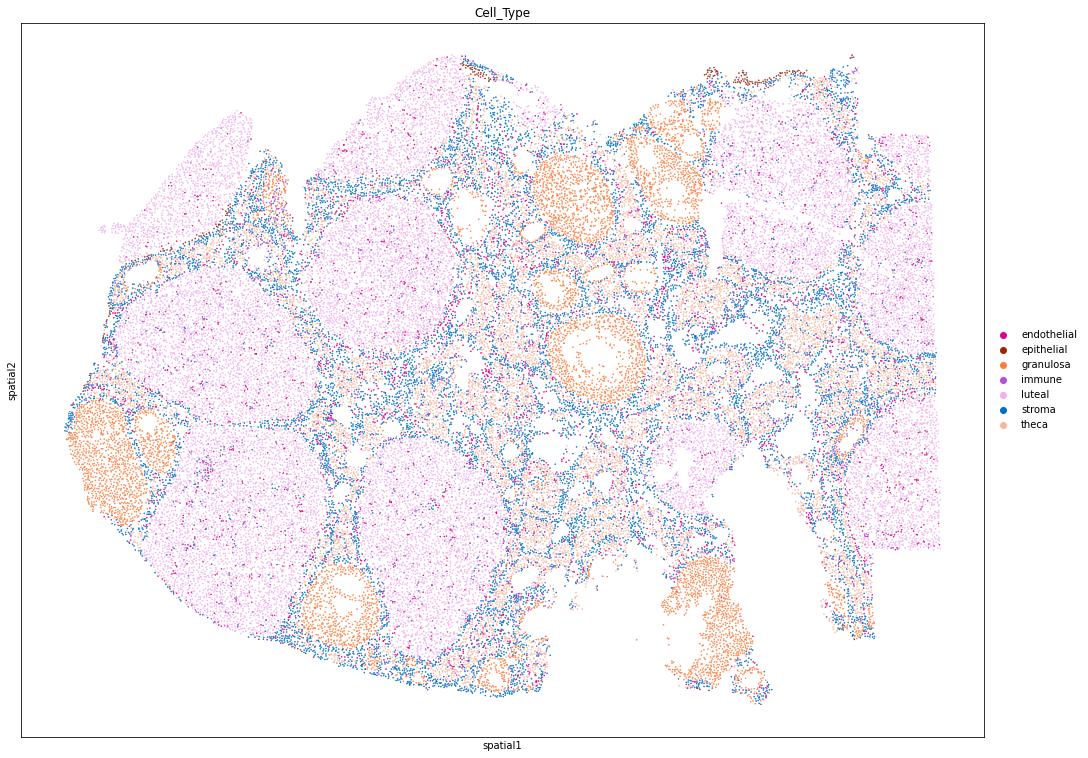

In [58]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cell_Type",
    size=0.5,
    library_id='spatial',
    figsize=(15, 15)
)


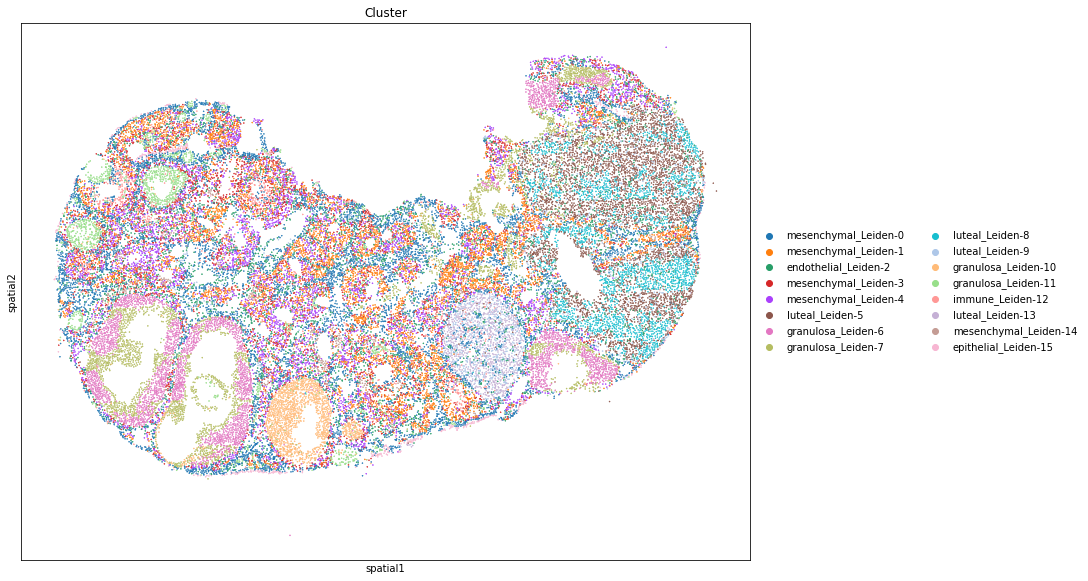

In [31]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cluster",
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

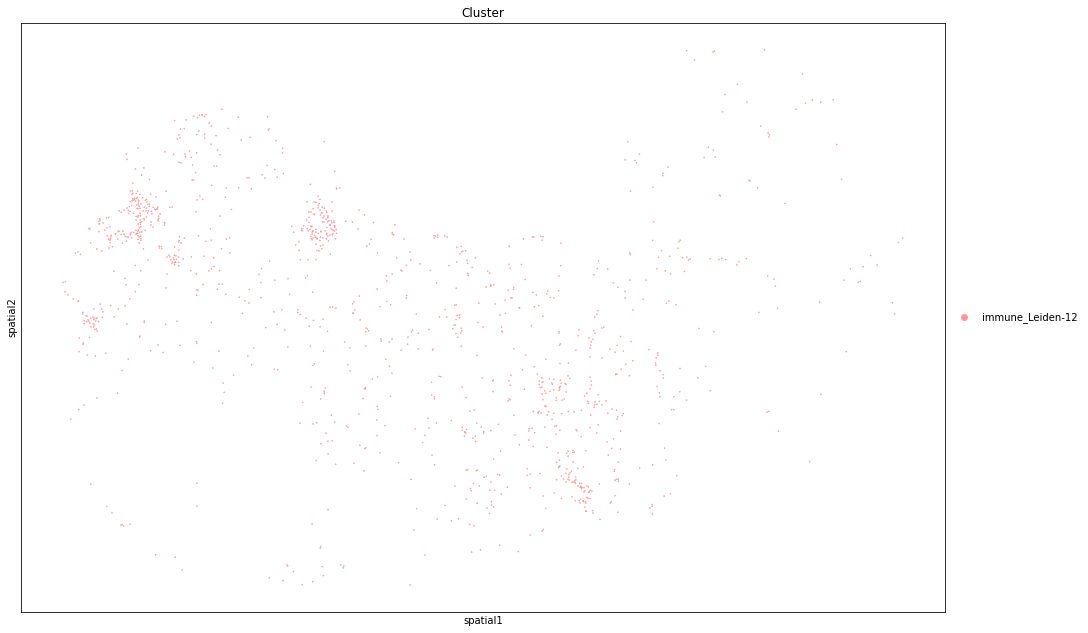

In [37]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cluster",
    groups = ['immune_Leiden-12'],
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

  0%|          | 0/1000 [00:00<?, ?/s]

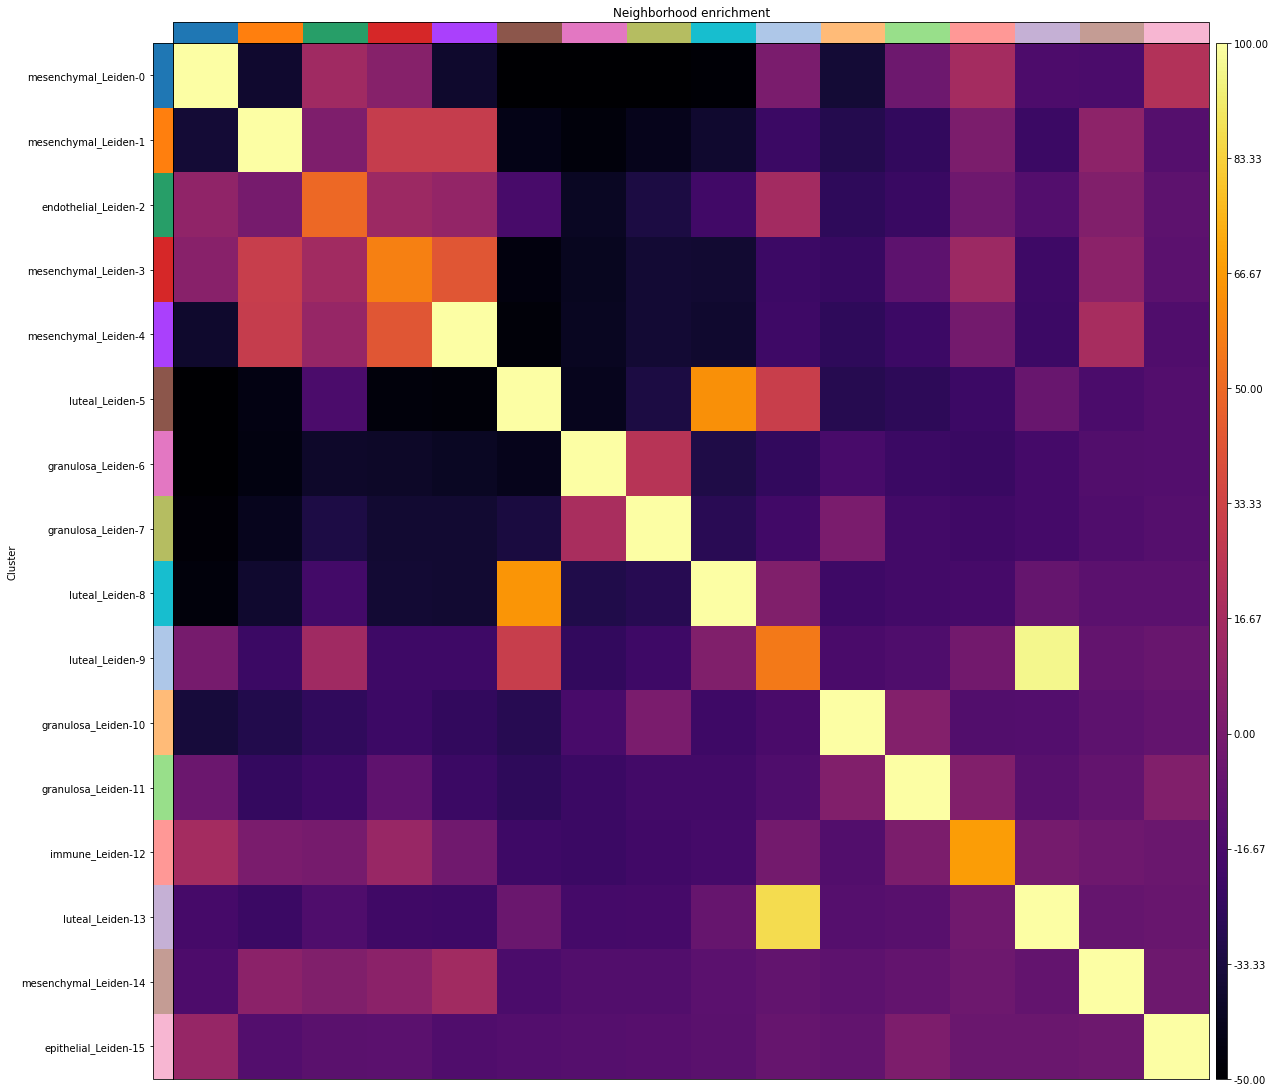

In [38]:
sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial")
sq.gr.nhood_enrichment(adata, cluster_key="Cluster")
sq.pl.nhood_enrichment(adata, cluster_key="Cluster", cmap="inferno", vmin=-50, vmax=100, figsize=(15,15))

In [39]:
sq.gr.spatial_autocorr(adata, mode="moran")
num_view = 12
top_autocorr = adata.uns['moranI']['I'].sort_values(ascending=False).head(num_view).index.tolist()
bot_autocorr = adata.uns['moranI']['I'].sort_values(ascending=True).head(num_view).index.tolist()

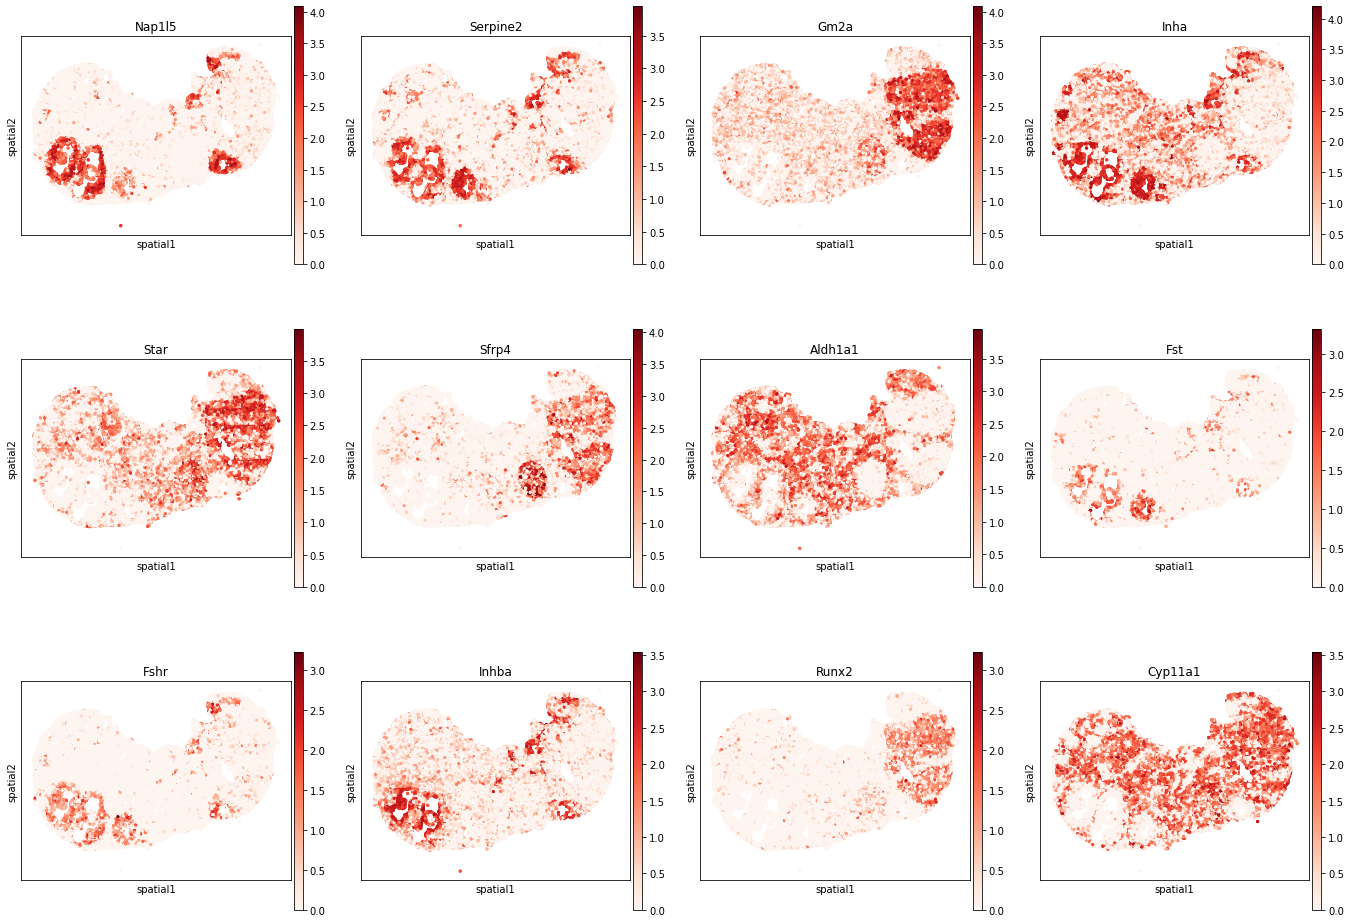

In [40]:
sq.pl.spatial_scatter(
    adata,
    color=top_autocorr,
    size=20,
    cmap='Reds',
    img=False,
    figsize=(5,5),
    shape = None,
    library_id='spatial',
)

In [41]:
sq.gr.centrality_scores(adata, cluster_key="Cluster")

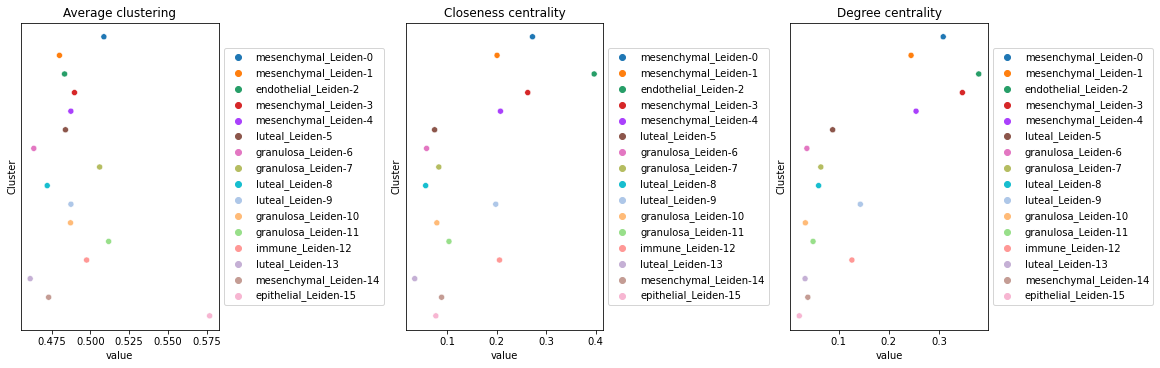

In [42]:
sq.pl.centrality_scores(adata, cluster_key="Cluster", figsize=(16, 5))

In [25]:
adata.write('/home/jupyter/region_6/processed_region6.h5ad')